<a href="https://colab.research.google.com/github/R91198/Horses-and-Humans-Classifier/blob/master/Horses_%26_Humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install -q keras

In [2]:
import keras

Using TensorFlow backend.


In [3]:
train_path = '/content/drive/My Drive/Deep Learning/Horses and Humans/train'
valid_path = '/content/drive/My Drive/Deep Learning/Horses and Humans/validation'

train_horses_path = '/content/drive/My Drive/Deep Learning/Horses and Humans/train/horses'
train_humans_path = '/content/drive/My Drive/Deep Learning/Horses and Humans/train/humans'
valid_horses_path = '/content/drive/My Drive/Deep Learning/Horses and Humans/validation/horses'
valid_humans_path = '/content/drive/My Drive/Deep Learning/Horses and Humans/validation/horses'

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [5]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [6]:
inception_model = tf.keras.applications.InceptionV3(input_shape = (150,150,3),include_top = False,weights = None)                                                

In [10]:
# Freezing the weights and all the parameters of the model
for layer in inception_model.layers:
    layer.trainable = False

In [11]:
# Model summary
inception_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [12]:
# Using the model from here
last_layer = inception_model.get_layer('mixed7')
print('Last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output 

Last layer output shape:  (None, 7, 7, 768)


In [13]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [25]:
from tensorflow.keras.optimizers import RMSprop

# Flattening the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Adding a fully connected layer with 1024 hidden units and 'ReLU' activation
x = layers.Dense(1024, activation='relu')(x)
# Adding the dropout rate of 0.2
x = layers.Dropout(0.2)(x) 
# Adding second fully connected layer with 512 hidden units and 'ReLU' activation
x = layers.Dense(512, activation='relu')(x) 
# Adding the dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Adding third fully connected layer with 512 hidden units and 'ReLU' activation
x = layers.Dense(512, activation='relu')(x)
# Adding the dropout rate of 0.2
x = layers.Dropout(0.2)(x) 
# Adding fourth fully connected layer with 256 hidden units and 'ReLu' activation
x = layers.Dense(256, activation='relu')(x)
# Adding the dropout rate of 0.2
x = layers.Dropout(0.2)(x)               
# Adding the final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)           

model = Model(inception_model.input, x) 

model.compile(optimizer = RMSprop(lr = 0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])



In [26]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1. / 255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150)) 

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(valid_path,
                                                         batch_size = 20,
                                                         class_mode = 'binary',
                                                         target_size = (150, 150))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [30]:
callbacks = myCallback()
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=40,
                              verbose=1,
                              callbacks=[callbacks])

Epoch 1/40
52/52 [==============================] - 12s 234ms/step - loss: 0.5032 - accuracy: 0.7663 - val_loss: 0.6526 - val_accuracy: 0.6172
Epoch 2/40
52/52 [==============================] - 12s 235ms/step - loss: 0.5151 - accuracy: 0.7507 - val_loss: 0.5290 - val_accuracy: 0.7539
Epoch 3/40
52/52 [==============================] - 12s 236ms/step - loss: 0.5331 - accuracy: 0.7283 - val_loss: 0.5389 - val_accuracy: 0.7695
Epoch 4/40
52/52 [==============================] - 12s 238ms/step - loss: 0.4833 - accuracy: 0.7760 - val_loss: 0.5947 - val_accuracy: 0.7773
Epoch 5/40
52/52 [==============================] - 12s 236ms/step - loss: 0.5103 - accuracy: 0.7614 - val_loss: 0.5108 - val_accuracy: 0.7617
Epoch 6/40
52/52 [==============================] - 12s 235ms/step - loss: 0.4765 - accuracy: 0.7858 - val_loss: 1.1174 - val_accuracy: 0.5781
Epoch 7/40
52/52 [==============================] - 12s 233ms/step - loss: 0.4759 - accuracy: 0.7858 - val_loss: 0.5124 - val_accuracy: 0.7695

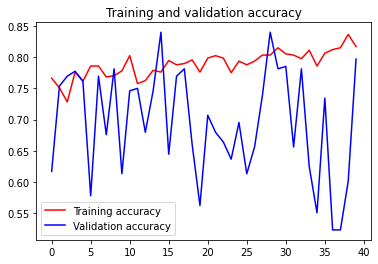

<Figure size 432x288 with 0 Axes>

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()